This is a ML project for the Food Prices in Idea dataset


In [11]:
# First we import the libraris to be used in the project

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting the data
# Plot correlation matrix
import seaborn as sns # for plotting the matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
# open the file and visualize the data in a table

df=pd.read_csv('food_prices_ind.csv')
print(df)

              date      admin1      admin2            market   latitude  \
0            #date  #adm1+name  #adm2+name  #loc+market+name   #geo+lat   
1       1994-01-15       Delhi       Delhi             Delhi  28.666667   
2       1994-01-15       Delhi       Delhi             Delhi  28.666667   
3       1994-01-15       Delhi       Delhi             Delhi  28.666667   
4       1994-01-15     Gujarat   Ahmadabad         Ahmedabad  23.033333   
...            ...         ...         ...               ...        ...   
168491  2024-01-15   Rajasthan      Jaipur        North Zone  26.938848   
168492  2024-01-15   Rajasthan      Jaipur        North Zone  26.938848   
168493  2024-01-15   Rajasthan      Jaipur        North Zone  26.938848   
168494  2024-01-15   Rajasthan      Jaipur        North Zone  26.938848   
168495  2024-01-15   Rajasthan      Jaipur        North Zone  26.938848   

        longitude               category        commodity        unit  \
0        #geo+lon         

/tmp/ipykernel_282/463553341.py:3: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('food_prices_ind.csv')


In [13]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167


In [14]:
# Let's drop the 0 values 
df = df.drop(0)
df.info

<bound method DataFrame.info of               date     admin1     admin2      market   latitude  longitude  \
1       1994-01-15      Delhi      Delhi       Delhi  28.666667  77.216667   
2       1994-01-15      Delhi      Delhi       Delhi  28.666667  77.216667   
3       1994-01-15      Delhi      Delhi       Delhi  28.666667  77.216667   
4       1994-01-15    Gujarat  Ahmadabad   Ahmedabad  23.033333  72.616667   
5       1994-01-15    Gujarat  Ahmadabad   Ahmedabad  23.033333  72.616667   
...            ...        ...        ...         ...        ...        ...   
168491  2024-01-15  Rajasthan     Jaipur  North Zone  26.938848  75.800056   
168492  2024-01-15  Rajasthan     Jaipur  North Zone  26.938848  75.800056   
168493  2024-01-15  Rajasthan     Jaipur  North Zone  26.938848  75.800056   
168494  2024-01-15  Rajasthan     Jaipur  North Zone  26.938848  75.800056   
168495  2024-01-15  Rajasthan     Jaipur  North Zone  26.938848  75.800056   

                     category  

In [15]:
df.sample(5)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
17277,2012-12-15,Chandigarh,Chandigarh,Chandigarh,30.7343,76.7933,cereals and tubers,Wheat,KG,actual,Retail,INR,18.0,0.3294
111226,2021-09-15,Orissa,Sundargarh,Rourkela,22.260423,84.853584,cereals and tubers,Wheat flour,KG,actual,Retail,INR,29.91,0.4061
64494,2018-03-15,Bihar,Banka,Bhagalpur,24.883333,86.916667,pulses and nuts,Lentils (urad),KG,actual,Retail,INR,88.0,1.3573
52718,2017-02-15,Bihar,Patna,Patna,25.6,85.116667,cereals and tubers,Potatoes,KG,actual,Retail,INR,10.36,0.1551
57886,2017-07-15,Tamil Nadu,Dindigul,Dindigul,10.35,77.95,milk and dairy,Milk (pasteurized),L,actual,Retail,INR,34.0,0.5278


In [16]:
data = df.drop(columns=['latitude','longitude','date'])


print(data)

           admin1     admin2      market               category  \
1           Delhi      Delhi       Delhi     cereals and tubers   
2           Delhi      Delhi       Delhi     miscellaneous food   
3           Delhi      Delhi       Delhi           oil and fats   
4         Gujarat  Ahmadabad   Ahmedabad     cereals and tubers   
5         Gujarat  Ahmadabad   Ahmedabad     cereals and tubers   
...           ...        ...         ...                    ...   
168491  Rajasthan     Jaipur  North Zone           oil and fats   
168492  Rajasthan     Jaipur  North Zone           oil and fats   
168493  Rajasthan     Jaipur  North Zone        pulses and nuts   
168494  Rajasthan     Jaipur  North Zone        pulses and nuts   
168495  Rajasthan     Jaipur  North Zone  vegetables and fruits   

              commodity unit priceflag pricetype currency   price usdprice  
1                  Rice   KG    actual    Retail      INR     8.0    0.255  
2                 Sugar   KG    actual   

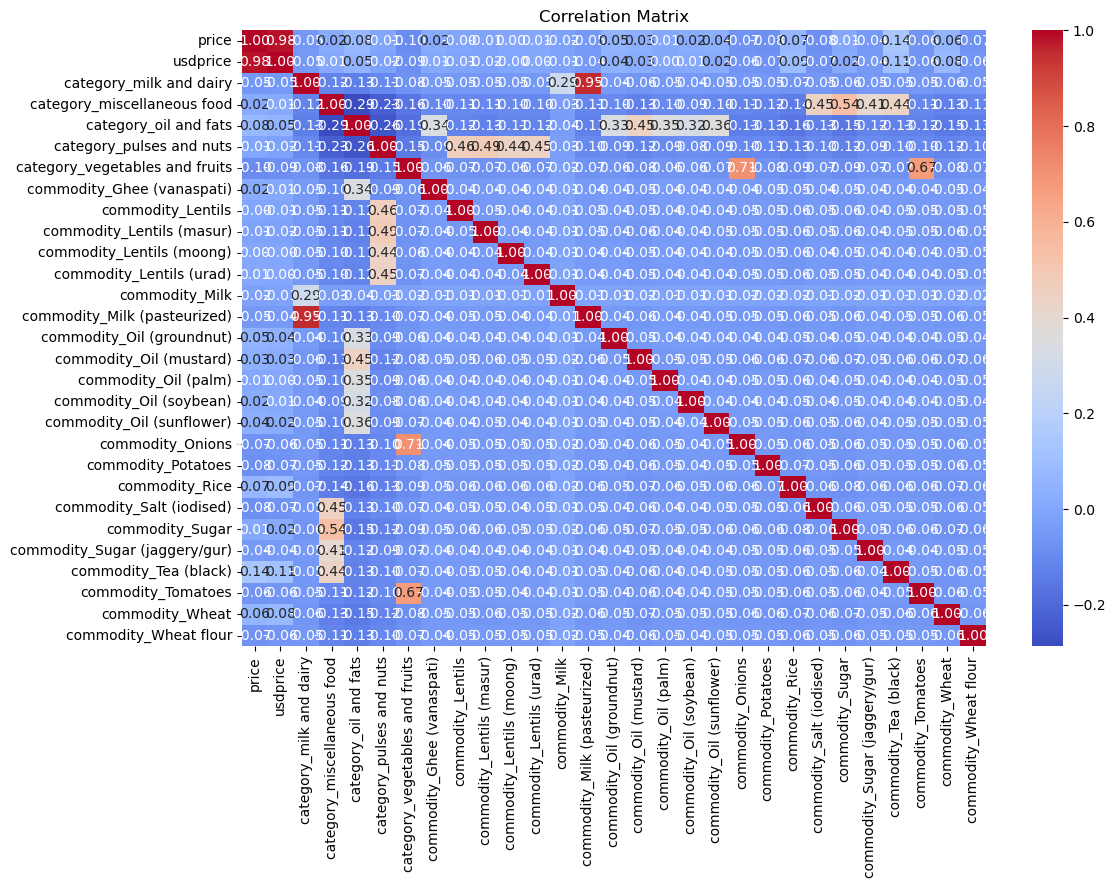

In [17]:
# Drop non-numeric columns
df_numeric = data.drop(columns=['admin1', 'admin2', 'market', 'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency'])

# Convert categorical variables into numerical format using one-hot encoding
df_encoded = pd.get_dummies(data[['category', 'commodity']], drop_first=True)

# Concatenate numerical and encoded columns
df_final = pd.concat([df_numeric, df_encoded], axis=1)

# Generate correlation matrix
correlation_matrix = df_final.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [18]:
# Calculate correlation coefficients between 'price' and other numerical features

price_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)

# Select top features with high correlation coefficients
top_features = price_correlation[1:]  # Exclude 'price' itself
print(top_features)

usdprice                          0.980354
commodity_Tea (black)             0.144987
category_vegetables and fruits    0.095519
category_oil and fats             0.078709
commodity_Potatoes                0.077412
commodity_Salt (iodised)          0.077332
commodity_Onions                  0.069637
commodity_Wheat flour             0.067365
commodity_Rice                    0.065962
commodity_Tomatoes                0.061895
commodity_Wheat                   0.059026
commodity_Oil (groundnut)         0.053670
category_milk and dairy           0.052003
commodity_Milk (pasteurized)      0.048646
commodity_Sugar (jaggery/gur)     0.042965
commodity_Oil (sunflower)         0.036938
commodity_Oil (mustard)           0.030396
commodity_Oil (soybean)           0.024736
category_miscellaneous food       0.019431
commodity_Milk                    0.017934
commodity_Ghee (vanaspati)        0.017323
commodity_Lentils (masur)         0.013605
commodity_Sugar                   0.009276
commodity_O

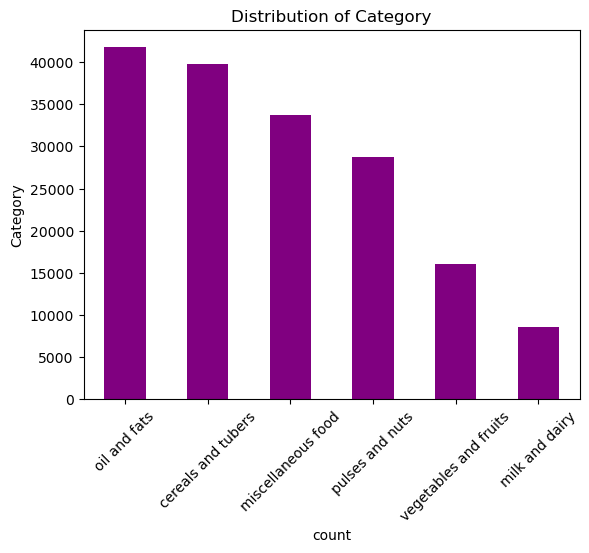

,commodity,count
0,Rice,12337
1,Sugar,11390
2,Oil (mustard),10595
3,Wheat,10376
4,Potatoes,8682
5,Onions,8418
6,Wheat flour,8343
7,Salt (iodised),7967
8,Milk (pasteurized),7898
9,Lentils (masur),7782


In [19]:
# Let's plot the categorry and have a look to the count of each commodity

df['category'].value_counts().plot(kind='bar',color='purple')
plt.title('Distribution of Category')
plt.xlabel('count')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

category_commodity=df.groupby(['category','commodity']).size()
category_commodity

df['commodity'].value_counts().reset_index()

In [20]:
# Select relevant features and target variable
features = df_final[['usdprice', 'commodity_Tea (black)', 'category_vegetables and fruits', 'category_oil and fats']]
target_variable = 'price'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target_variable], test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training R^2 score: {train_score:.2f}")
print(f"Testing R^2 score: {test_score:.2f}")

Training R^2 score: 0.96
Testing R^2 score: 0.97


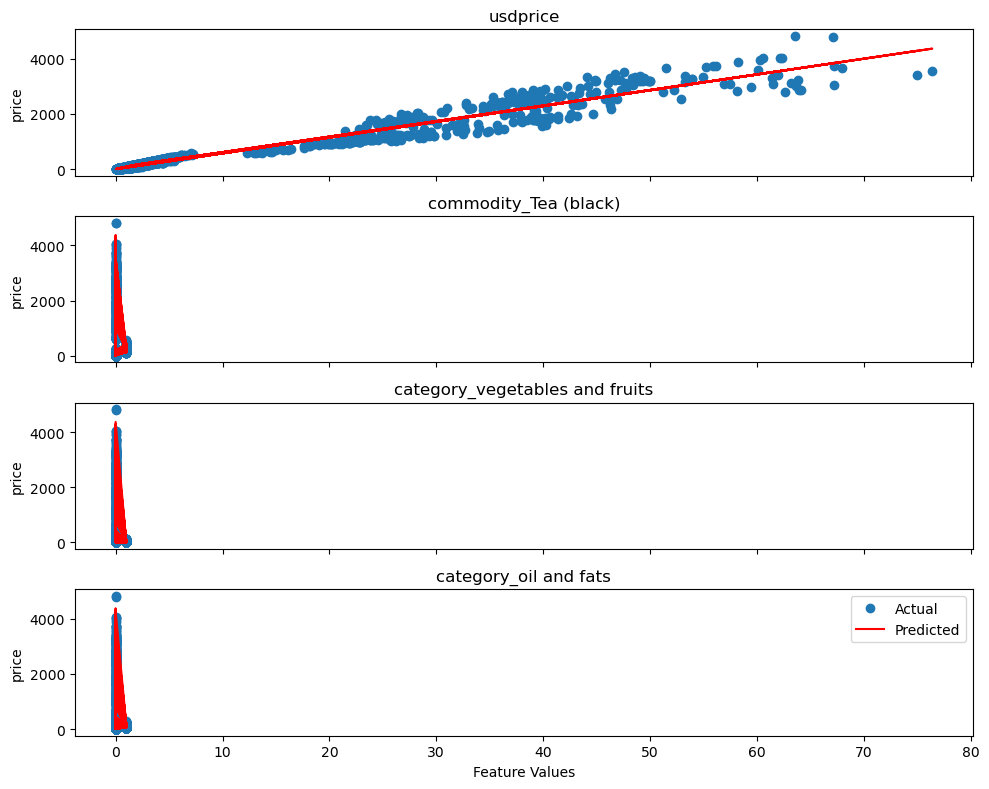

In [21]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(len(features.columns), 1, figsize=(10, 8), sharex=True)

# Iterate over each feature
for i, col in enumerate(features.columns):
    # Plot the feature
    axs[i].plot(X_test[col], y_test, 'o', label='Actual')
    axs[i].plot(X_test[col], model.predict(X_test), 'r-', label='Predicted')
    axs[i].set_title(col)
    axs[i].set_ylabel(target_variable)

# Add legend and labels
axs[-1].set_xlabel('Feature Values')
plt.legend()
plt.tight_layout()
plt.show()
